In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# import data
df = pd.read_csv('deliverable_2.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420420 entries, 0 to 420419
Data columns (total 8 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Period                             420420 non-null  object 
 1   Primary classification             420420 non-null  object 
 2   Secondary classification variable  420420 non-null  object 
 3   Secondary classification value     352170 non-null  object 
 4   Variable                           420420 non-null  object 
 5   Statistic                          420420 non-null  object 
 6   Rounded N                          420420 non-null  float64
 7   Value                              309024 non-null  float64
dtypes: float64(2), object(6)
memory usage: 25.7+ MB


In [20]:
df['Primary classification'].unique()

array(['A. LILEE proxy', 'B. 10% expenditure fuel poor',
       'C. Not LILEE proxy', 'D. Not 10% expenditure fuel poor',
       'E. All households'], dtype=object)

# half-hourly energy demand profile

- year 2021, 2022, 2023
- five primary classification
- Clean_elec_imp_Wh_hh_mean_1 (1 to 48)
- Clean_gas_imp_Wh_hh_mean_1 (1 to 48)

## LILEE vs Not-LILEE

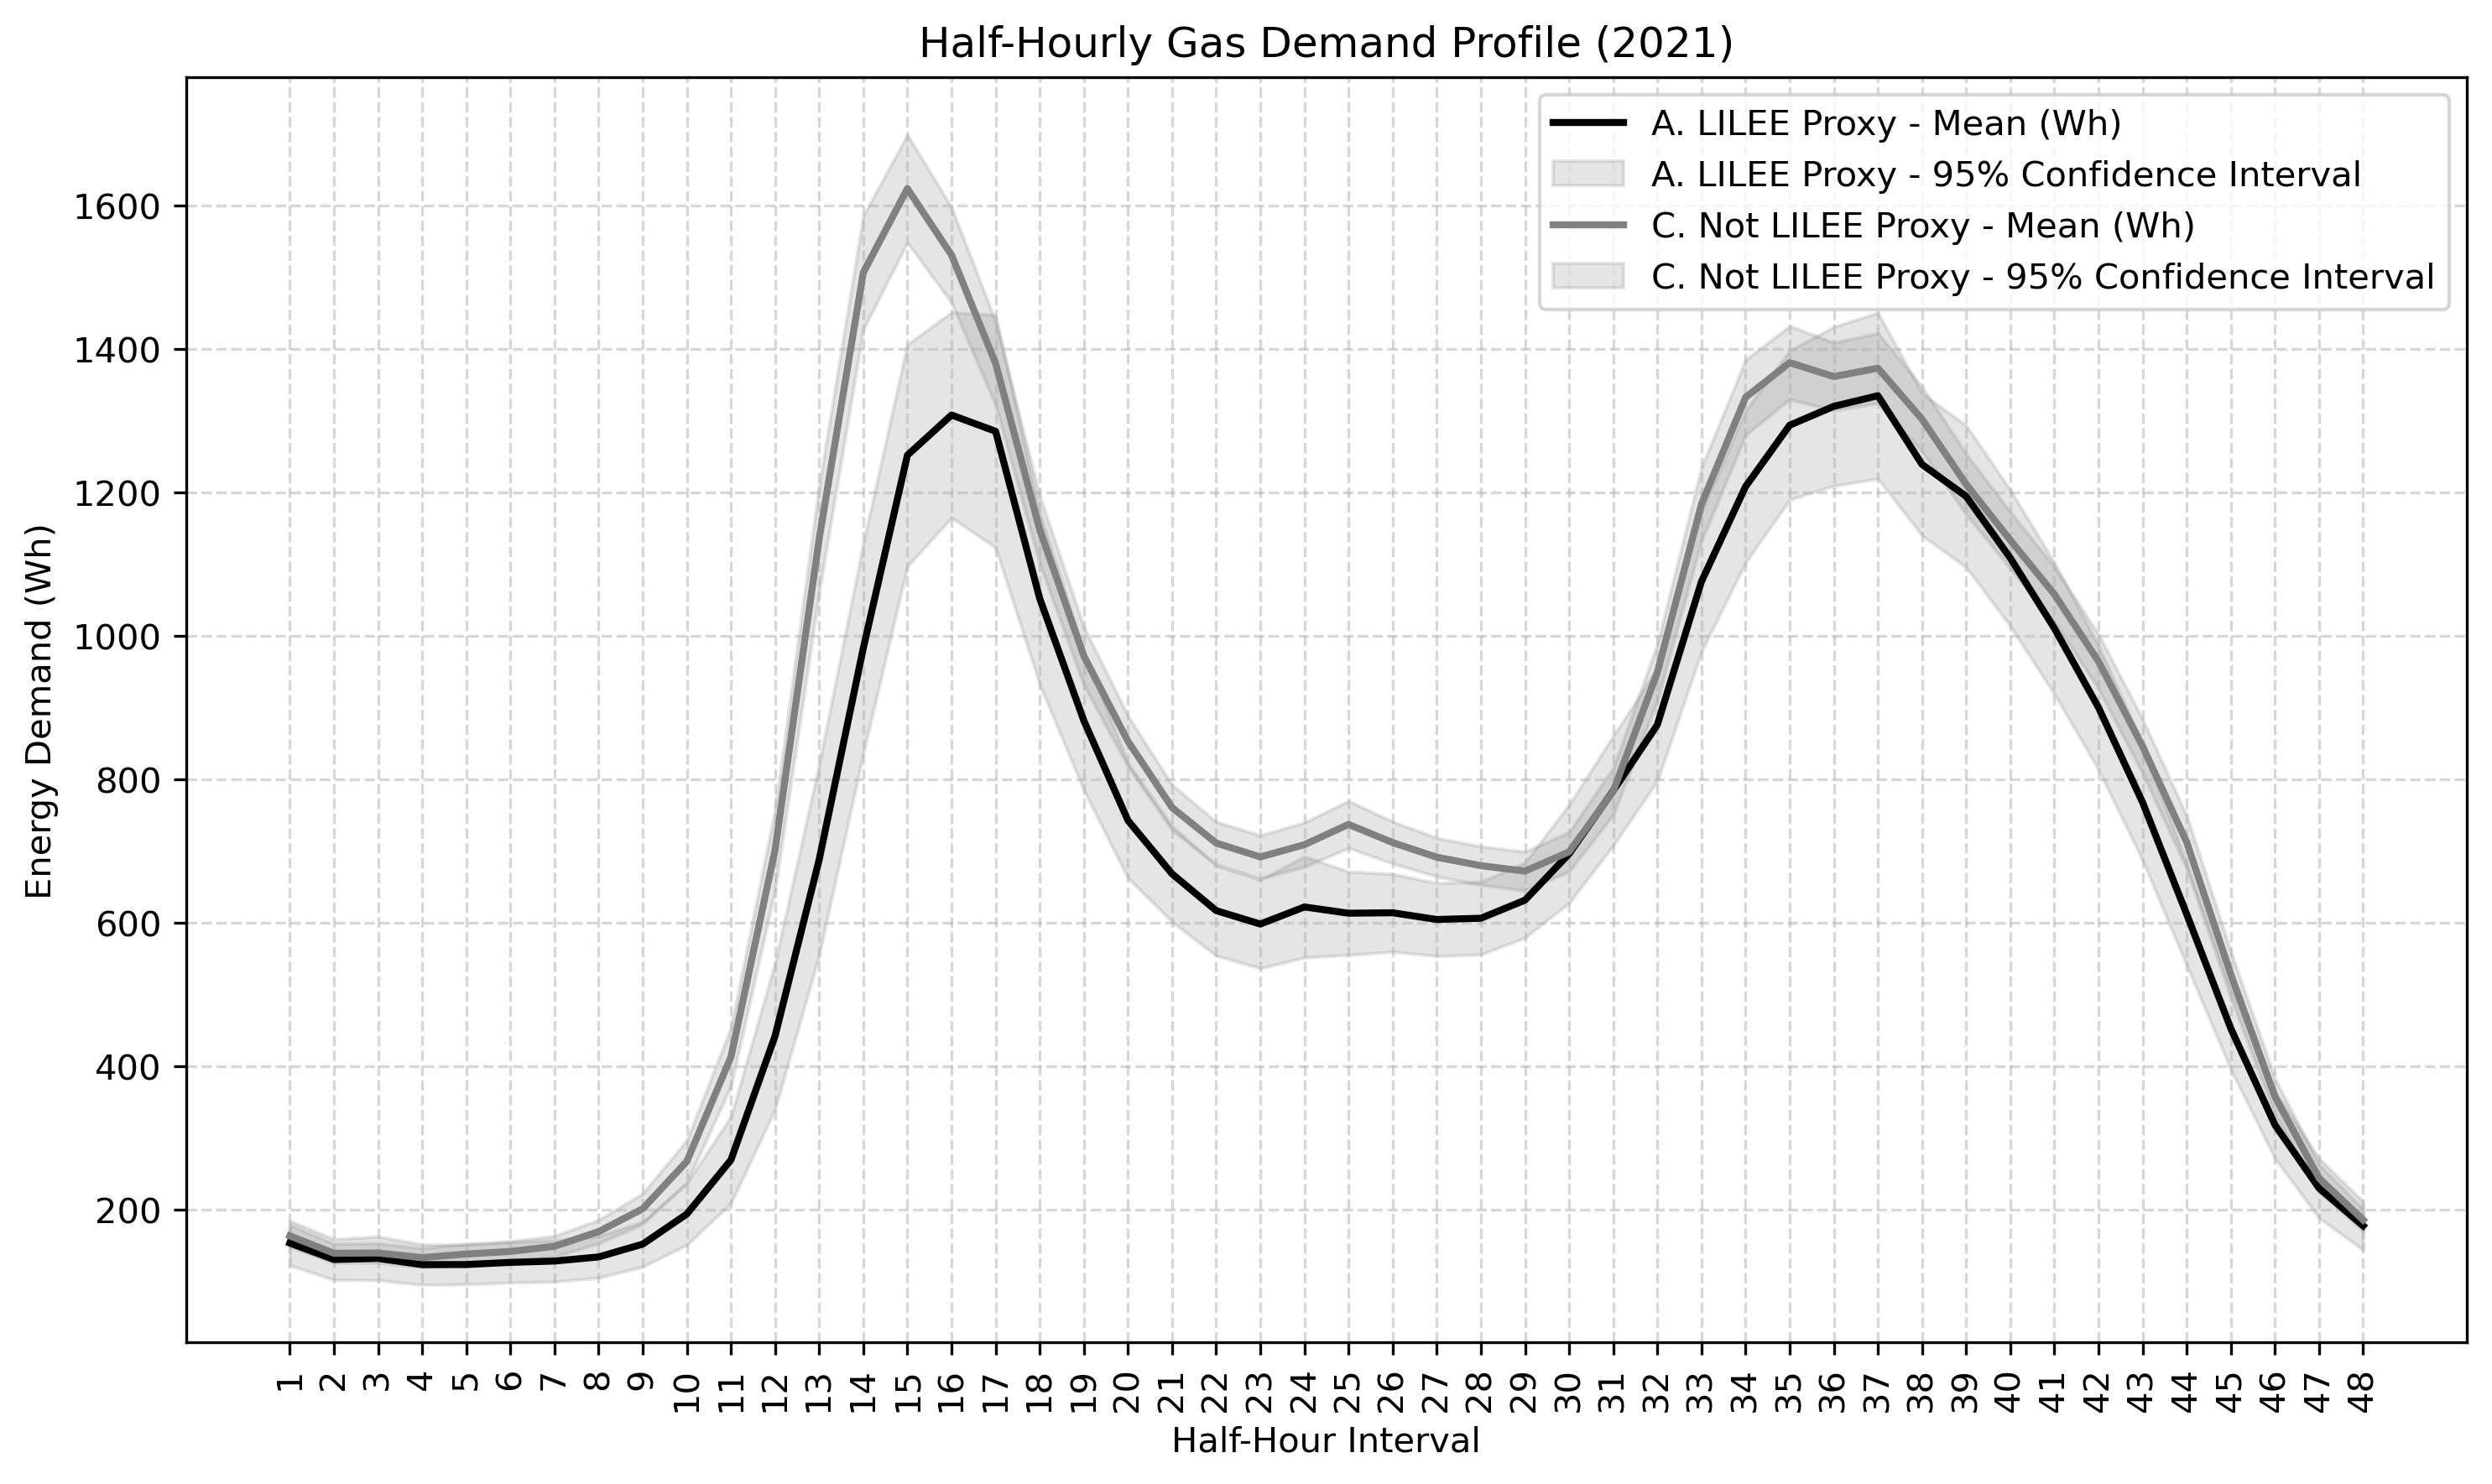

In [21]:
data = df.copy()

# Filter for 'A. LILEE proxy'
filtered_data = data.loc[
    (data['Period'] == "2021") &
    (data['Primary classification'] == 'A. LILEE proxy') &
    (data['Secondary classification variable'] == 'All households') &
    (data['Variable'].str.contains('hh') & data['Variable'].str.contains('gas'))
]

# Extract the interval index from the 'Variable' column
filtered_data = filtered_data.copy()  # Avoid SettingWithCopyWarning
filtered_data['Interval'] = filtered_data['Variable'].str.extract(r'(\d+)$').astype(int)

# Filter for 'mean' and 'sem' statistics
mean_data = filtered_data.loc[filtered_data['Statistic'] == 'mean']
sem_data = filtered_data.loc[filtered_data['Statistic'] == 'sem']

# Merge mean and SEM data on common columns
merged_data = mean_data.merge(
    sem_data,
    on=['Period', 'Primary classification', 'Secondary classification variable', 'Variable', 'Interval'],
    suffixes=('_mean', '_sem')
)

# Calculate the 95% confidence interval
merged_data['CI_Lower'] = merged_data['Value_mean'] - 1.96 * merged_data['Value_sem']
merged_data['CI_Upper'] = merged_data['Value_mean'] + 1.96 * merged_data['Value_sem']

# Sort data by interval for plotting
merged_data = merged_data.sort_values('Interval')

# Filter for 'C. Not LILEE proxy'
filtered_data_not_lilee = data.loc[
    (data['Period'] == "2021") &
    (data['Primary classification'] == 'C. Not LILEE proxy') &
    (data['Secondary classification variable'] == 'All households') &
    (data['Variable'].str.contains('hh') & data['Variable'].str.contains('gas'))
]

# Extract the interval index from the 'Variable' column
filtered_data_not_lilee = filtered_data_not_lilee.copy()  # Avoid SettingWithCopyWarning
filtered_data_not_lilee['Interval'] = filtered_data_not_lilee['Variable'].str.extract(r'(\d+)$').astype(int)

# Filter for 'mean' and 'sem' statistics
mean_data_not_lilee = filtered_data_not_lilee.loc[filtered_data_not_lilee['Statistic'] == 'mean']
sem_data_not_lilee = filtered_data_not_lilee.loc[filtered_data_not_lilee['Statistic'] == 'sem']

# Merge mean and SEM data on common columns
merged_data_not_lilee = mean_data_not_lilee.merge(
    sem_data_not_lilee,
    on=['Period', 'Primary classification', 'Secondary classification variable', 'Variable', 'Interval'],
    suffixes=('_mean', '_sem')
)

# Calculate the 95% confidence interval
merged_data_not_lilee['CI_Lower'] = merged_data_not_lilee['Value_mean'] - 1.96 * merged_data_not_lilee['Value_sem']
merged_data_not_lilee['CI_Upper'] = merged_data_not_lilee['Value_mean'] + 1.96 * merged_data_not_lilee['Value_sem']

# Sort data by interval for plotting
merged_data_not_lilee = merged_data_not_lilee.sort_values('Interval')

# Plot the mean line and confidence interval for both classifications
plt.figure(figsize=(10, 6), dpi=300)

# Plot 'A. LILEE proxy'
plt.plot(
    merged_data['Interval'],
    merged_data['Value_mean'],
    label='A. LILEE Proxy - Mean (Wh)',
    color='black',
    linewidth=2
)
plt.fill_between(
    merged_data['Interval'],
    merged_data['CI_Lower'],
    merged_data['CI_Upper'],
    color='grey',
    alpha=0.2,
    label='A. LILEE Proxy - 95% Confidence Interval'
)

# Plot 'C. Not LILEE proxy'
plt.plot(
    merged_data_not_lilee['Interval'],
    merged_data_not_lilee['Value_mean'],
    label='C. Not LILEE Proxy - Mean (Wh)',
    color='grey',
    linewidth=2
)
plt.fill_between(
    merged_data_not_lilee['Interval'],
    merged_data_not_lilee['CI_Lower'],
    merged_data_not_lilee['CI_Upper'],
    color='grey',
    alpha=0.2,
    label='C. Not LILEE Proxy - 95% Confidence Interval'
)

# Add labels, legend, and formatting
plt.xticks(ticks=range(1, 49), labels=range(1, 49), rotation=90)
plt.title('Half-Hourly Gas Demand Profile (2021)')
plt.xlabel('Half-Hour Interval')
plt.ylabel('Energy Demand (Wh)')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("./plots/half_hourly_gas_demand_profile_2021_LILEE_vs_Not_LILEE.png")
plt.show()


## LILEE vs All households

In [22]:
df['Primary classification'].unique()

array(['A. LILEE proxy', 'B. 10% expenditure fuel poor',
       'C. Not LILEE proxy', 'D. Not 10% expenditure fuel poor',
       'E. All households'], dtype=object)

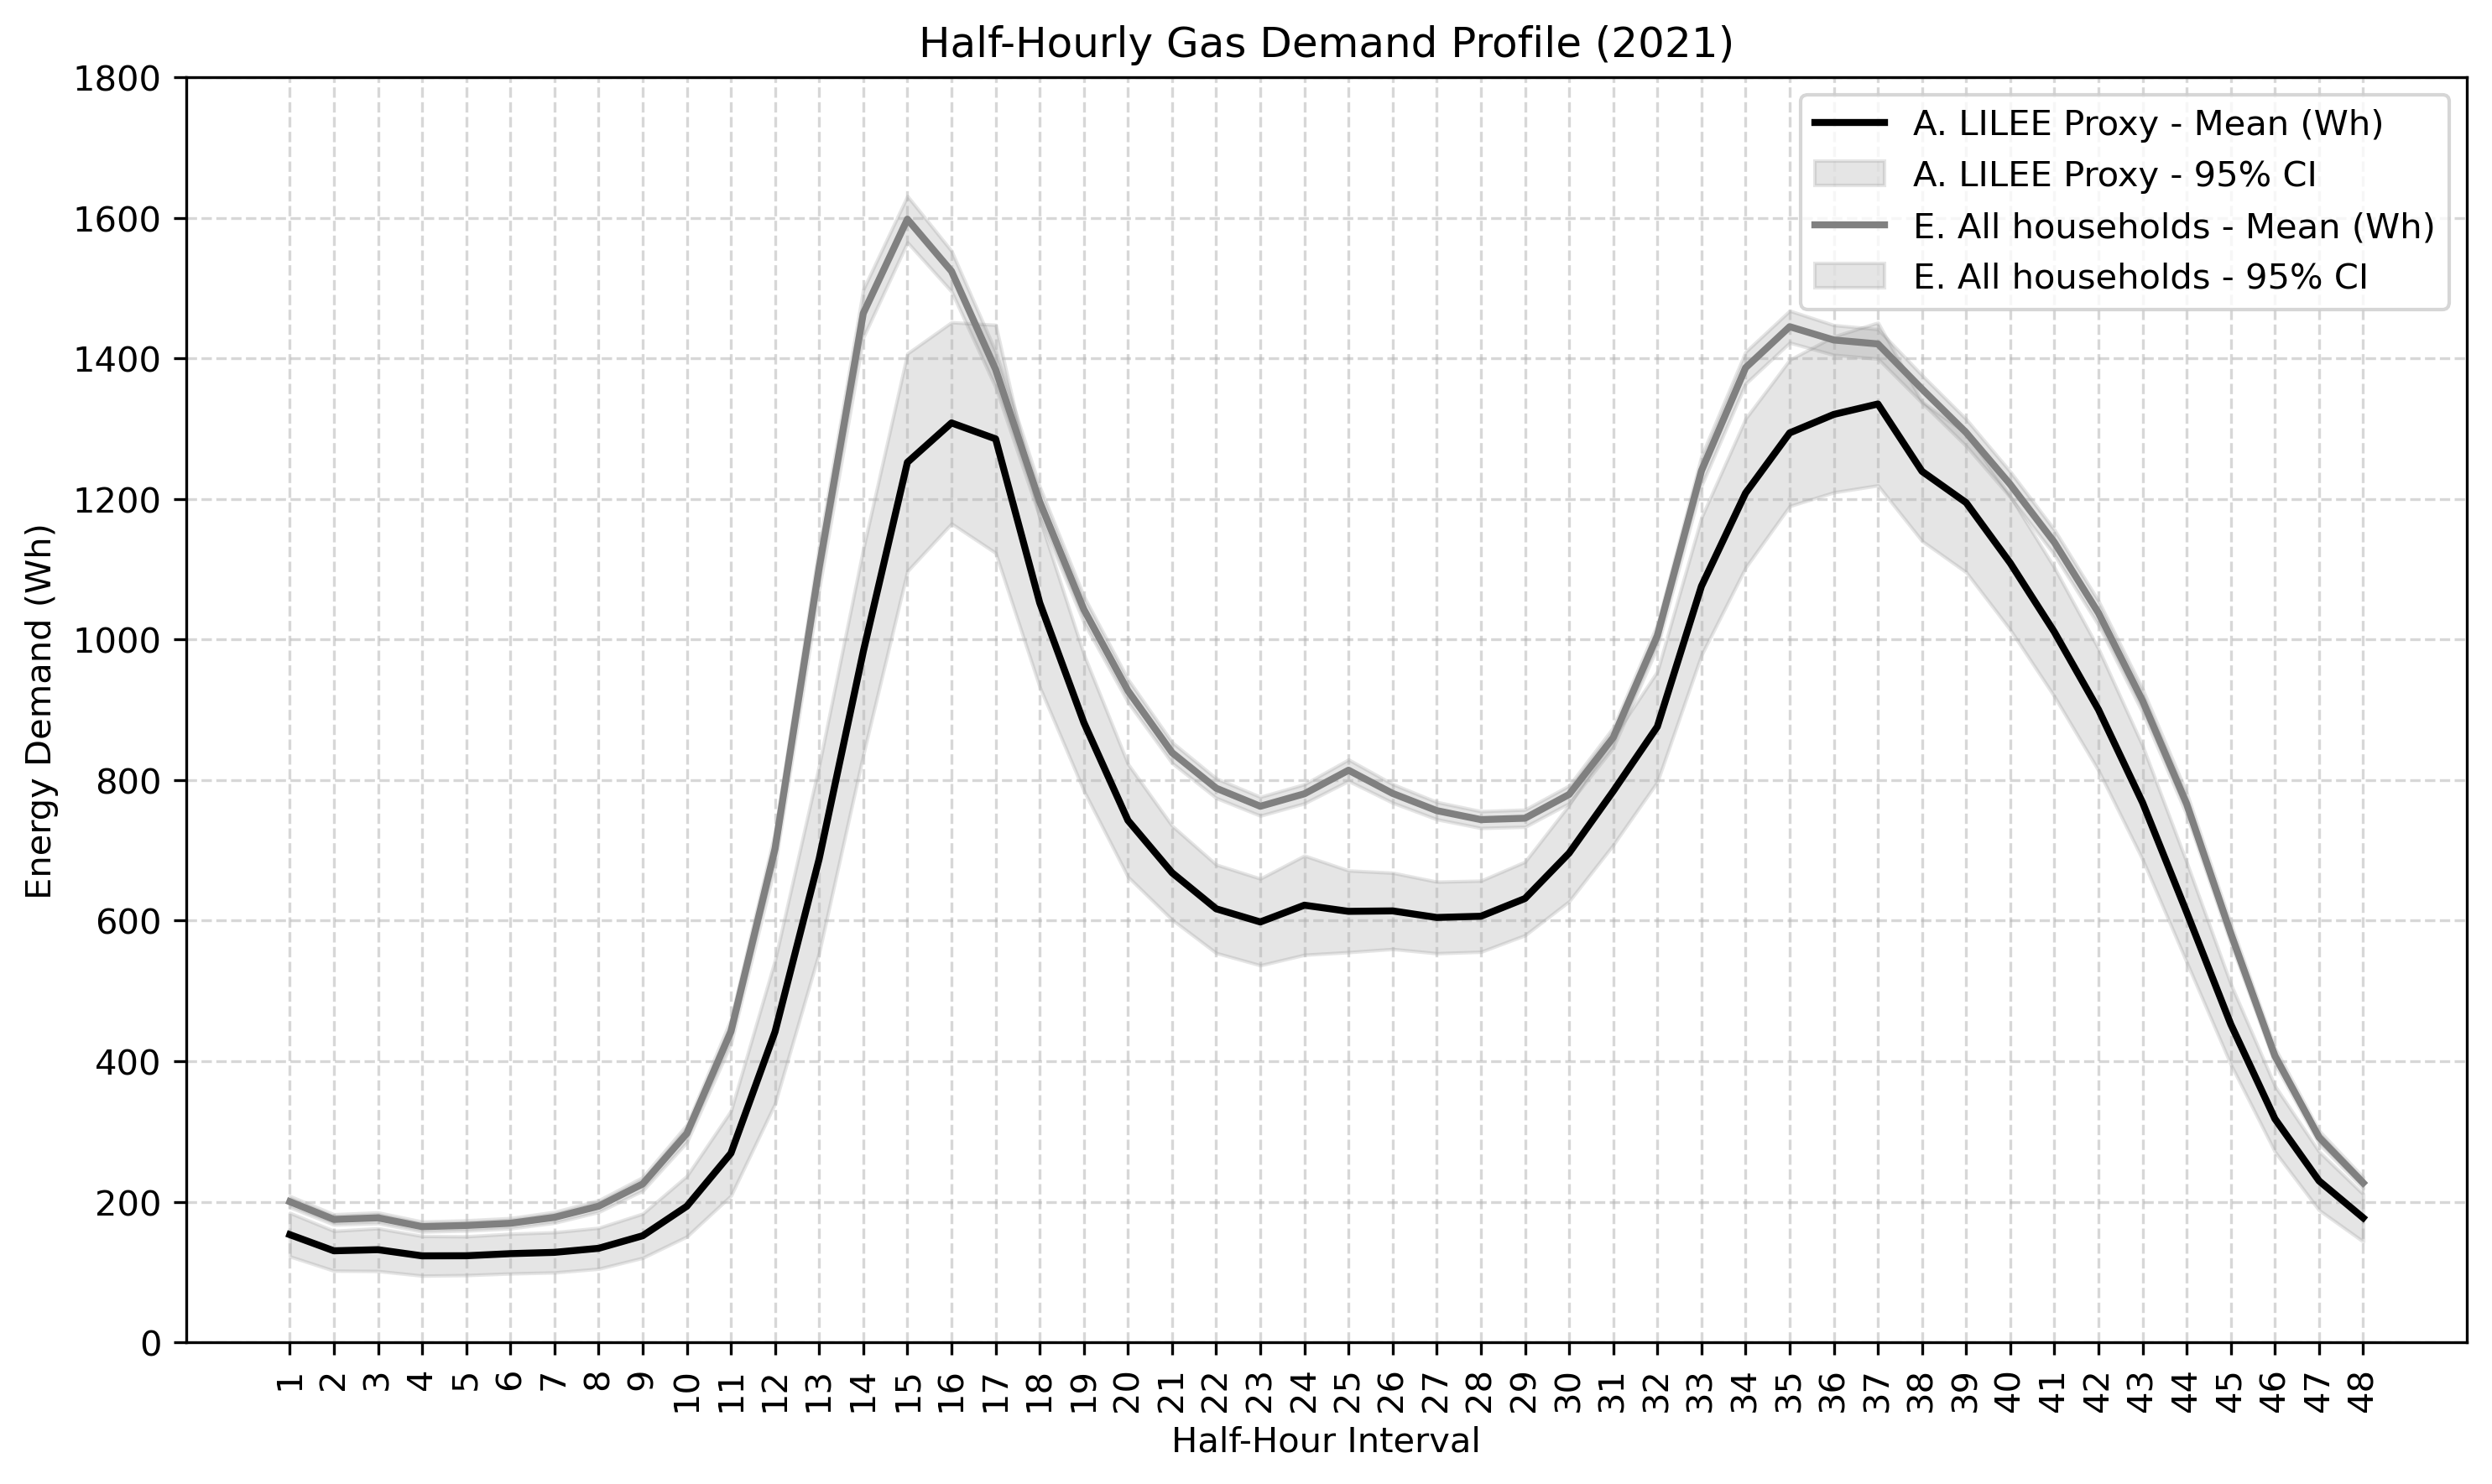

In [23]:
data = df.copy()

# Filter for 'A. LILEE proxy'
filtered_data = data.loc[
    (data['Period'] == "2021") &
    (data['Primary classification'] == 'A. LILEE proxy') &
    (data['Secondary classification variable'] == 'All households') &
    (data['Variable'].str.contains('hh') & data['Variable'].str.contains('gas'))
]

# Extract the interval index from the 'Variable' column
filtered_data = filtered_data.copy()  # Avoid SettingWithCopyWarning
filtered_data['Interval'] = filtered_data['Variable'].str.extract(r'(\d+)$').astype(int)

# Filter for 'mean' and 'sem' statistics
mean_data = filtered_data.loc[filtered_data['Statistic'] == 'mean']
sem_data = filtered_data.loc[filtered_data['Statistic'] == 'sem']

# Merge mean and SEM data on common columns
merged_data = mean_data.merge(
    sem_data,
    on=['Period', 'Primary classification', 'Secondary classification variable', 'Variable', 'Interval'],
    suffixes=('_mean', '_sem')
)

# Calculate the 95% confidence interval
merged_data['CI_Lower'] = merged_data['Value_mean'] - 1.96 * merged_data['Value_sem']
merged_data['CI_Upper'] = merged_data['Value_mean'] + 1.96 * merged_data['Value_sem']

# Sort data by interval for plotting
merged_data = merged_data.sort_values('Interval')

# Filter for 'E. All households'
filtered_data_not_lilee = data.loc[
    (data['Period'] == "2021") &
    (data['Primary classification'] == 'E. All households') &
    (data['Secondary classification variable'] == 'All households') &
    (data['Variable'].str.contains('hh') & data['Variable'].str.contains('gas'))
]

# Extract the interval index from the 'Variable' column
filtered_data_not_lilee = filtered_data_not_lilee.copy()  # Avoid SettingWithCopyWarning
filtered_data_not_lilee['Interval'] = filtered_data_not_lilee['Variable'].str.extract(r'(\d+)$').astype(int)

# Filter for 'mean' and 'sem' statistics
mean_data_not_lilee = filtered_data_not_lilee.loc[filtered_data_not_lilee['Statistic'] == 'mean']
sem_data_not_lilee = filtered_data_not_lilee.loc[filtered_data_not_lilee['Statistic'] == 'sem']

# Merge mean and SEM data on common columns
merged_data_not_lilee = mean_data_not_lilee.merge(
    sem_data_not_lilee,
    on=['Period', 'Primary classification', 'Secondary classification variable', 'Variable', 'Interval'],
    suffixes=('_mean', '_sem')
)

# Calculate the 95% confidence interval
merged_data_not_lilee['CI_Lower'] = merged_data_not_lilee['Value_mean'] - 1.96 * merged_data_not_lilee['Value_sem']
merged_data_not_lilee['CI_Upper'] = merged_data_not_lilee['Value_mean'] + 1.96 * merged_data_not_lilee['Value_sem']

# Sort data by interval for plotting
merged_data_not_lilee = merged_data_not_lilee.sort_values('Interval')

# Plot the mean line and confidence interval for both classifications
plt.figure(figsize=(10, 6), dpi=300)

# Plot 'A. LILEE proxy'
plt.plot(
    merged_data['Interval'],
    merged_data['Value_mean'],
    label='A. LILEE Proxy - Mean (Wh)',
    color='black',
    linewidth=2
)
plt.fill_between(
    merged_data['Interval'],
    merged_data['CI_Lower'],
    merged_data['CI_Upper'],
    color='grey',
    alpha=0.2,
    label='A. LILEE Proxy - 95% CI'
)

# Plot 'E. All households'
plt.plot(
    merged_data_not_lilee['Interval'],
    merged_data_not_lilee['Value_mean'],
    label='E. All households - Mean (Wh)',
    color='grey',
    linewidth=2
)
plt.fill_between(
    merged_data_not_lilee['Interval'],
    merged_data_not_lilee['CI_Lower'],
    merged_data_not_lilee['CI_Upper'],
    color='grey',
    alpha=0.2,
    label='E. All households - 95% CI'
)

# Add labels, legend, and formatting
plt.xticks(ticks=range(1, 49), labels=range(1, 49), rotation=90)
plt.ylim(0, 1800)
plt.title('Half-Hourly Gas Demand Profile (2021)')
plt.xlabel('Half-Hour Interval')
plt.ylabel('Energy Demand (Wh)')
plt.legend(loc='upper right')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("./plots/half_hourly_gas_demand_profile_2021_LILEE_vs_All.png")
plt.show()
